Bu model şirkətlərə reklam xərclərinə, müştəri seqmentinə və marketinq platformaları kimi amillərə əsaslanan gələcək satışları proqnozlaşdırmağa imkan verir. Bu model vasitəsilə biznes analitiklər, şirkətlərin tarixi məlumatları təhlil edə, marketinq strategiyalarını optimallaşdıra, həmçinin resursları səmərəli şəkildə bölmək və gəlir potensialını maksimum dərəcədə artırmaq üçün qərarlar qəbul edə bilərlər. Davamlı olaraq modelləri yeni məlumatlarla yeniləməklə, şirkətlər bazar dinamikasına uyğunlaşa və rəqabət mühitində daha yaxşı nəticələr əldə edə bilərlər.

In [1]:
# Lazımi paketləri yükləyirik

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as sm
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
import os
import warnings

In [33]:
# Tarixi məlumatları yükləyirik

df = pd.read_csv("tarixi_məlumatlar.csv")

### Tədqiq edilən məlumatlarının təhlili

In [34]:
# Məlumatların ilk 5 sətrini ekrana çıxardırıq

df.head()

,Unnamed: 0,TV,Radio,Qəzet,Satışlar
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [35]:
# Sütun adlarını əldə edirik

df.columns

Index(['Unnamed: 0', 'TV', 'Radio', 'Qəzet', 'Satışlar'], dtype='object')

In [36]:
# 'Unnamed: 0' adlı sütnunu 'Index' adına dəyişiri
df.rename(columns={'Unnamed: 0': 'Index'}, inplace=True)


In [37]:
df

,Index,TV,Radio,Qəzet,Satışlar
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [38]:
# Məlumatları yoxlayırıq, null və ya düzgün formatda olmayan məlumatların olub olmamasını yoxlayırıq

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Index     200 non-null    int64  
 1   TV        200 non-null    float64
 2   Radio     200 non-null    float64
 3   Qəzet     200 non-null    float64
 4   Satışlar  200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [39]:
# Ədədi sütunların statistikasını əldə edirik

df.describe().T

,count,mean,std,min,25%,50%,75%,max
Index,200.0,100.5000,57.879185,1.0,50.750,100.50,150.250,200.0
TV,200.0,147.0425,85.854236,0.7,74.375,149.75,218.825,296.4
Radio,200.0,23.2640,14.846809,0.0,9.975,22.90,36.525,49.6
Qəzet,200.0,30.5540,21.778621,0.3,12.750,25.75,45.100,114.0
Satışlar,200.0,14.0225,5.217457,1.6,10.375,12.90,17.400,27.0


In [41]:
# Məlumatlarda null dəyərlərinin olub olmamsını yoxlayırıq

df.isnull().values.any()
df.isnull().sum()

Index       0
TV          0
Radio       0
Qəzet       0
Satışlar    0
dtype: int64

### Məlumatların Vizuallaşdırılması

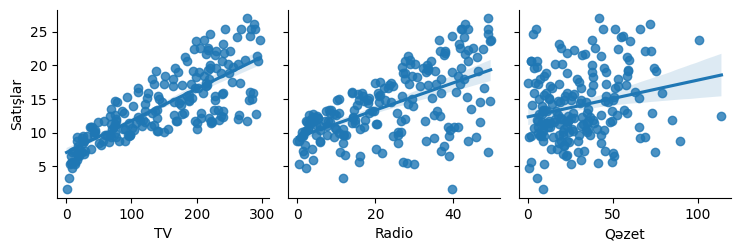

In [42]:
# Satışların reklan növlərindən asılılıq qrafikini qururuq

sns.pairplot(df, x_vars=["TV", "Radio", "Qəzet"], y_vars="Satışlar", kind="reg")


### Modelin tərtib edilməsi

In [43]:
# Model hazırlığı

X = df.drop('Satışlar', axis=1)
y = df[["Satışlar"]]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=46)


In [44]:
# Xətti reqressiya modeli

lin_model = sm.ols(formula="Satışlar ~ TV + Radio + Qəzet", data=df).fit()


In [45]:
# Xətti modelin əmsallarını çap edirik

print(lin_model.params, "\n")

Intercept    2.938889
TV           0.045765
Radio        0.188530
Qəzet       -0.001037
dtype: float64 



In [46]:
# Xətti reqressiya modelinin ümumi məlumatlarını çap edirik

print(lin_model.summary())


                            OLS Regression Results                            
Dep. Variable:               Satışlar   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Mon, 15 Jan 2024   Prob (F-statistic):           1.58e-96
Time:                        10:01:45   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.0

In [47]:
# Modelin qiymətləndirilməsi

results = []
names = []

In [50]:
# Qiymətləndirmək üçün modellərin siyahısını müəyyənləşdiririk

models = [('XəttiReqressiya', LinearRegression())]

In [51]:
# Modelin RMSE-ni hesablayırıq

for name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    result = np.sqrt(mean_squared_error(y_test, y_pred))
    results.append(result)
    names.append(name)
    msg = "%s: %f" % (name, result)
    print(msg)

XəttiReqressiya: 1.703648


### Satış proqnozları

In [52]:
# Yeni məlumatlara uyğun olaraq satış proqnozunu veririk

new_data = pd.DataFrame({'TV': [100], 'Radio': [50], 'Qəzet': [25]})
predicted_sales = lin_model.predict(new_data)
print("Satış Proqnozu:", predicted_sales)

Satış Proqnozu: 0    16.915917
dtype: float64


In [55]:
# Yeni məlumatlara uyğun olaraq satış proqnozunu veririk

new_data = pd.DataFrame({'TV': [125], 'Radio': [63], 'Qəzet': [20]})
predicted_sales = lin_model.predict(new_data)
print("Satış Proqnozu:", predicted_sales)

Satış Proqnozu: 0    20.516111
dtype: float64
